## 1. 머신 러닝 (50+20점)
데이터 설명 : 주택 계약 관련 데이터

In [1]:
import pandas as pd
raw_df = pd.read_csv('./../data/29_problem1.csv', encoding='cp949')
raw_df.head()

,순번,계약구분,재계약횟수,거주개월,아파트 이름,아파트 ID,아파트 평점,호실고유번호,층,평형대,...,퇴거연도,거주연도,월세(원),보증금(원),대표나이,나이,성별,결혼여부,거주자 수,퇴거여부
0,1,유효,10,222,강남아파트,5,7.0,14520,1,12,...,NaN,2008,47100,3646000,46,33,남,미혼,3,미퇴거
1,1,유효,10,222,강남아파트,5,7.0,14520,1,12,...,NaN,2009,56500,4375000,46,34,남,미혼,3,미퇴거
2,1,유효,10,222,강남아파트,5,7.0,14520,1,12,...,NaN,2010,56500,4375000,46,35,남,미혼,3,미퇴거
3,1,유효,10,222,강남아파트,5,7.0,14520,1,12,...,NaN,2011,69900,5408000,46,36,남,미혼,3,미퇴거
4,1,유효,10,222,강남아파트,5,7.0,14520,1,12,...,NaN,2012,69900,5408000,46,37,남,미혼,3,미퇴거


In [3]:
df = raw_df.copy()

In [5]:
# 1-1. 각 계약자 고유번호를 기준으로 가장 최신의 거주연도만 포함하는 데이터 프레임을 만드시오.

In [111]:
'''
Column 확인
'''
df.columns

Index(['순번', '계약구분', '재계약횟수', '거주개월', '아파트 이름', '아파트 ID', '아파트 평점', '호실고유번호',
       '층', '평형대', '계약자고유번호', '계약서고유번호', '입주연도', '퇴거연도', '거주연도', '월세(원)',
       '보증금(원)', '대표나이', '나이', '성별', '결혼여부', '거주자 수', '퇴거여부'],
      dtype='object')

In [118]:
df_latest = df.sort_values('거주연도', ascending=False).groupby('계약자고유번호').head(1).copy()
df_latest.head()

,순번,계약구분,재계약횟수,거주개월,아파트 이름,아파트 ID,아파트 평점,호실고유번호,층,평형대,...,퇴거연도,거주연도,월세(원),보증금(원),대표나이,나이,성별,결혼여부,거주자 수,퇴거여부
86903,12883,유효,2,36,지산5단지아파트,3,8.0,86891,14,15,...,NaN,2020,45000,2365000,52,51,남,미혼,1,미퇴거
9330,1353,유효,10,234,비둘기아파트,1,5.0,6134,1,12,...,NaN,2020,36400,2062000,69,68,여,미혼,1,미퇴거
52192,7850,유효,11,298,용지아파트,2,7.0,52181,2,12,...,NaN,2020,61920,4671600,61,60,남,미혼,2,미퇴거
52179,7849,유효,10,222,용지아파트,2,7.0,52168,2,12,...,NaN,2020,154080,11624400,79,78,여,미혼,1,미퇴거
9343,1354,유효,10,234,비둘기아파트,1,5.0,6160,1,12,...,NaN,2020,53100,4323000,89,88,여,미혼,2,미퇴거


In [119]:
# 1-2. 1-1의 데이터로 EDA를 진행하고 결측치를 처리하시오.

In [120]:
(df_latest.isna().sum() / len(df)) * 100

순번         0.000000
계약구분       0.070192
재계약횟수      0.000000
거주개월       0.000000
아파트 이름     0.000000
아파트 ID     0.000000
아파트 평점     0.000000
호실고유번호     0.000000
층          0.000000
평형대        0.000000
계약자고유번호    0.000000
계약서고유번호    0.000000
입주연도       0.000000
퇴거연도       7.199899
거주연도       0.000000
월세(원)      0.000000
보증금(원)     0.000000
대표나이       0.000000
나이         0.000000
성별         0.000000
결혼여부       0.000000
거주자 수      0.000000
퇴거여부       0.000000
dtype: float64

In [121]:
# 퇴거 연도 확인
'''
미퇴거 -> 퇴거연도가 모두 Null 값으로 되어 있다.
퇴거 -> 퇴거연도 Null 값이 없다.

-> 거주연도로 대체.
'''
display(df_latest[df_latest['퇴거여부'] == '미퇴거']['퇴거연도'].notna().value_counts())
display(df_latest[df_latest['퇴거여부'] == '퇴거']['퇴거연도'].notna().value_counts())
df_latest['퇴거연도'] = df_latest['퇴거연도'].fillna(df_latest['거주연도'])

퇴거연도
False    6257
Name: count, dtype: int64

퇴거연도
True    4091
Name: count, dtype: int64

In [123]:
# 계약 구분 확인
'''
계약구분이 해지 -> 퇴거연도 값이 존재
계약구분이 유효 -> 퇴거연도 값이 존재하지 않음

전처리 방안
    -> 퇴건연도 값이 존재 -> 계약구분이 해지
    -> 퇴거연도 값이 존재하지 않음 -> 계약구분이 유효
'''
display(df_latest[df_latest['계약구분'] == '해지']['퇴거연도'].notna().value_counts())
display(df_latest[df_latest['계약구분'] == '유효']['퇴거연도'].notna().value_counts())
df_latest['계약구분'] = df_latest['퇴거연도'].apply(lambda x: '유효' if x is None else '해지')

퇴거연도
True    4069
Name: count, dtype: int64

퇴거연도
True    6218
Name: count, dtype: int64

In [124]:
# 아파트 평점 확인
'''
동일 아파트에 대해서는 동일한 아파트 평점을 가지는것으로 보임
아파트 이름을 기준으로 결측치를 처리한다.
'''
display(df.groupby('아파트 이름')['아파트 평점'].unique())

apt_score_dict = df.dropna().set_index('아파트 이름')['아파트 평점'].to_dict()
df_latest['아파트 평점'] = df_latest['아파트 이름'].map(apt_score_dict)

아파트 이름
강남아파트        [7.0]
까치아파트       [10.0]
비둘기아파트       [5.0]
용지아파트        [7.0]
지산5단지아파트     [8.0]
Name: 아파트 평점, dtype: object

In [125]:
# 1-3. 1-2의 데이터에서 이상치를 처리하시오.
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [126]:
df_latest.select_dtypes(include='number')

,순번,재계약횟수,거주개월,아파트 ID,아파트 평점,호실고유번호,층,평형대,계약자고유번호,계약서고유번호,입주연도,퇴거연도,거주연도,월세(원),보증금(원),대표나이,나이,거주자 수
86903,12883,2,36,3,8.0,86891,14,15,85274,13598,2018,2020.0,2020,45000,2365000,52,51,1
9330,1353,10,234,1,5.0,6134,1,12,61285,63240,2002,2020.0,2020,36400,2062000,69,68,1
52192,7850,11,298,2,7.0,52181,2,12,41544,42091,1996,2020.0,2020,61920,4671600,61,60,2
52179,7849,10,222,2,7.0,52168,2,12,31740,32173,2003,2020.0,2020,154080,11624400,79,78,1
9343,1354,10,234,1,5.0,6160,1,12,61298,63253,2002,2020.0,2020,53100,4323000,89,88,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35795,5372,4,78,1,5.0,41112,12,15,70360,72200,2002,2008.0,2008,48700,2372000,74,61,4
35536,5339,4,77,1,5.0,40624,11,12,52664,54613,2002,2008.0,2008,39200,1907000,102,89,1
73108,10838,3,68,2,7.0,73109,15,19,19723,20117,2002,2008.0,2008,53900,2822000,59,46,6
35614,5353,1,15,1,5.0,40782,11,15,74447,76263,2007,2008.0,2008,47300,2303000,41,28,2


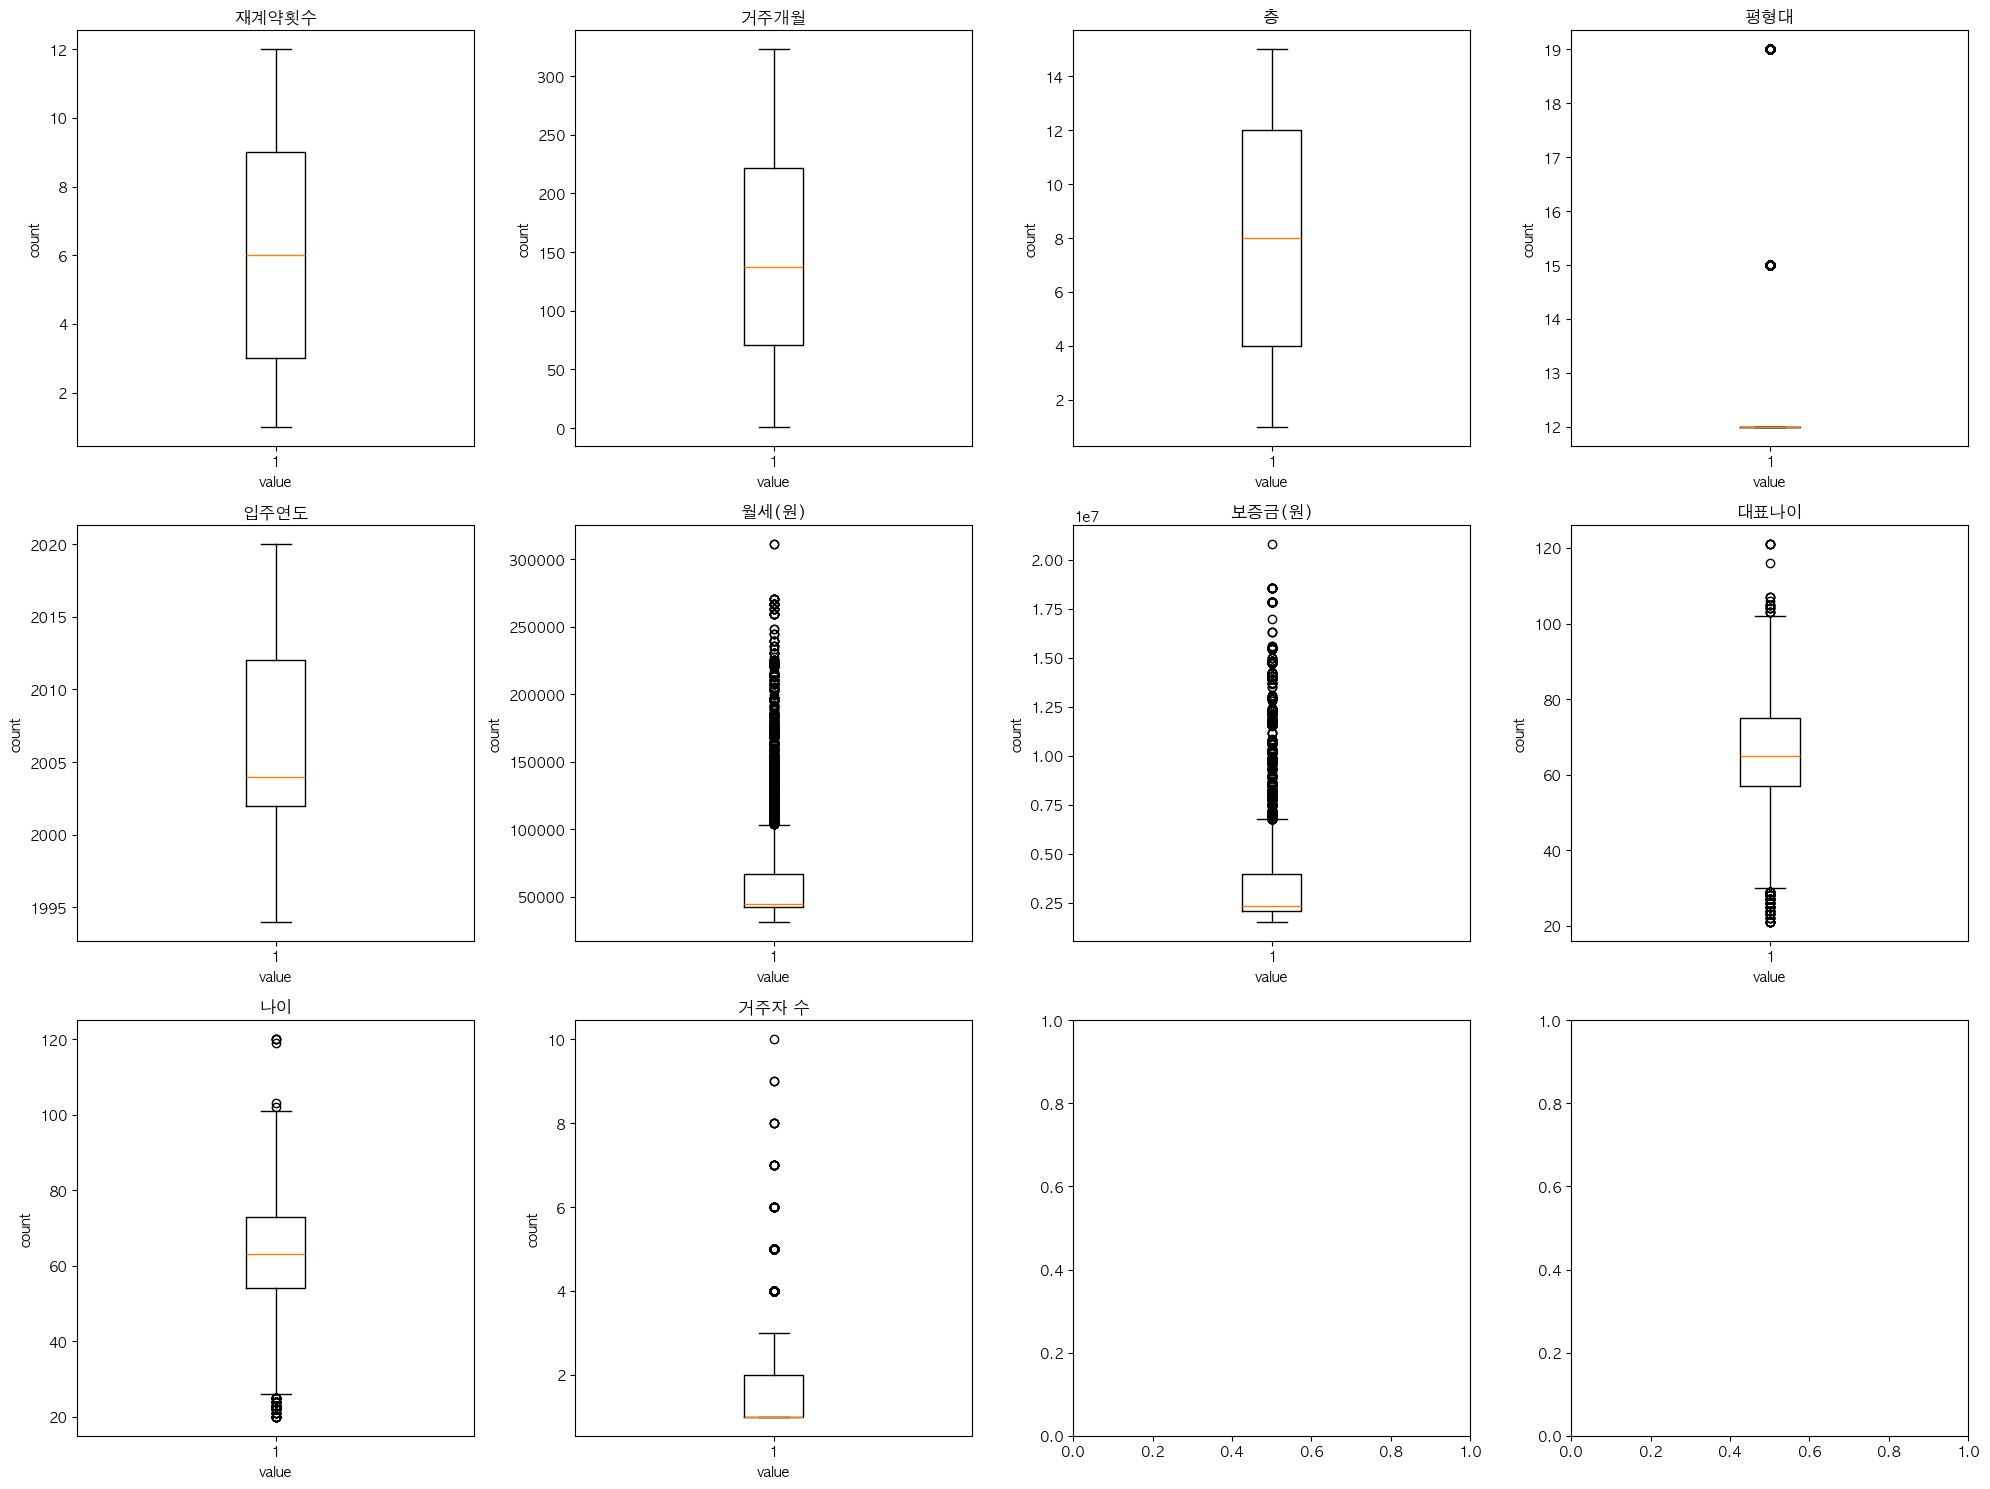

In [127]:
'''
이상치 확인
    완전히 불가능한 값으로 보이는 값은 없는것으로 보인다.
'''
columns = ['재계약횟수', '거주개월', '층', '평형대', '입주연도', '월세(원)', '보증금(원)', '대표나이', '나이', '거주자 수']
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()
for i, column in enumerate(columns):
    axes[i].boxplot(df_latest[column])
    axes[i].set_title(column)
    axes[i].set_xlabel('value')
    axes[i].set_ylabel('count')
plt.tight_layout()

In [128]:
# 1-4. 1-3의 데이터에서 재계약 횟수의 중앙값을 기준으로 중앙값보다 크거나 같으면 High, 작으면 Low로 renewal_h/l 변수를 생성하시오.

In [129]:
_median = df_latest['재계약횟수'].median()
_logic = lambda x: 'High' if x >= _median else 'Low'
df_latest['renewal_h/l'] = df_latest['재계약횟수'].apply(_logic)

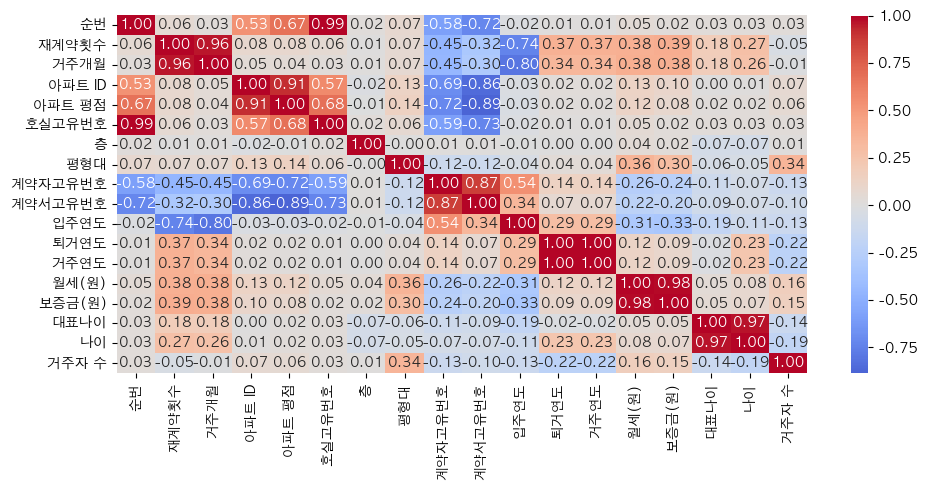

In [130]:
# 1-5. 1-4의 데이터로 차원 축소하고 차원축소가 필요한 이유를 논하시오.
# 차원축소가 불필요하다고 판단되는 경우, 차원을 축소하지 않되 그 근거를 논하시오.
'''
1. 상관관계가 매우 높은 변수들이 존재한다.
    -> 차원축소의 필요성
2. 아파트 이름, 평점과 같이 완전히 1대1 관계인 변수들이 존재한다.
    -> 차원축소의 필요성
'''
plt.figure(figsize=(10, 5))
sns.heatmap(df_latest.select_dtypes('number').corr(method='pearson'),
            annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.tight_layout()
plt.show()

In [131]:
df_latest.head()
df_latest.select_dtypes('number')

,순번,재계약횟수,거주개월,아파트 ID,아파트 평점,호실고유번호,층,평형대,계약자고유번호,계약서고유번호,입주연도,퇴거연도,거주연도,월세(원),보증금(원),대표나이,나이,거주자 수
86903,12883,2,36,3,8.0,86891,14,15,85274,13598,2018,2020.0,2020,45000,2365000,52,51,1
9330,1353,10,234,1,5.0,6134,1,12,61285,63240,2002,2020.0,2020,36400,2062000,69,68,1
52192,7850,11,298,2,7.0,52181,2,12,41544,42091,1996,2020.0,2020,61920,4671600,61,60,2
52179,7849,10,222,2,7.0,52168,2,12,31740,32173,2003,2020.0,2020,154080,11624400,79,78,1
9343,1354,10,234,1,5.0,6160,1,12,61298,63253,2002,2020.0,2020,53100,4323000,89,88,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35795,5372,4,78,1,5.0,41112,12,15,70360,72200,2002,2008.0,2008,48700,2372000,74,61,4
35536,5339,4,77,1,5.0,40624,11,12,52664,54613,2002,2008.0,2008,39200,1907000,102,89,1
73108,10838,3,68,2,7.0,73109,15,19,19723,20117,2002,2008.0,2008,53900,2822000,59,46,6
35614,5353,1,15,1,5.0,40782,11,15,74447,76263,2007,2008.0,2008,47300,2303000,41,28,2


In [140]:
# numeric column 추출
from sklearn.preprocessing import StandardScaler
numeric_cols = df_latest.select_dtypes(include='number').columns

# 무의미한 column 삭제
numeric_cols = numeric_cols.difference(['순번', '계약자고유번호', '계약서고유번호'])

# numeric column만 추출
df_numeric = df_latest[numeric_cols].copy()

# 정규화
scaler = StandardScaler()
df_numeric_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns, index=df_numeric.index)

In [141]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
df_numeric_scaled_pca = pd.DataFrame(
    pca.fit_transform(df_numeric_scaled),
    columns=[f'PC{i + 1}' for i in range(pca.n_components_)],
    index=df_numeric.index
)

In [142]:
numeric_cols = df_latest.select_dtypes(include='number').columns

df_latest_preproc = pd.concat([
    df_latest.drop(columns=numeric_cols),
    df_numeric_scaled_pca
], axis=1)

In [ ]:
# 1-6. 1-4의 데이터의 renewal_hl 변수를 기준으로 데이터를 나누고, 각 데이터의 특징을 서술하시오.
'''
Low 
    - 재계약 횟수의 중앙값보다 적은 계약자들
    - 남자의 경우 여자보다 재계약 횟수가 적은 비율이 많다.
    - 퇴거의 비율이 많다.

High
    - 재계약 횟수의 중앙값보다 많은 계약자들
    - 남자의 경우 여자보다 재계약 횟수가 적은 비율이 적다.
    - 퇴거의 비율이 적다.
    
PCA1의 경우 차이가 좀 나는것으로 보인다.
'''
df_high = df_latest_preproc[df_latest_preproc['renewal_h/l'] == 'High']
df_low = df_latest_preproc[df_latest_preproc['renewal_h/l'] == 'Low']

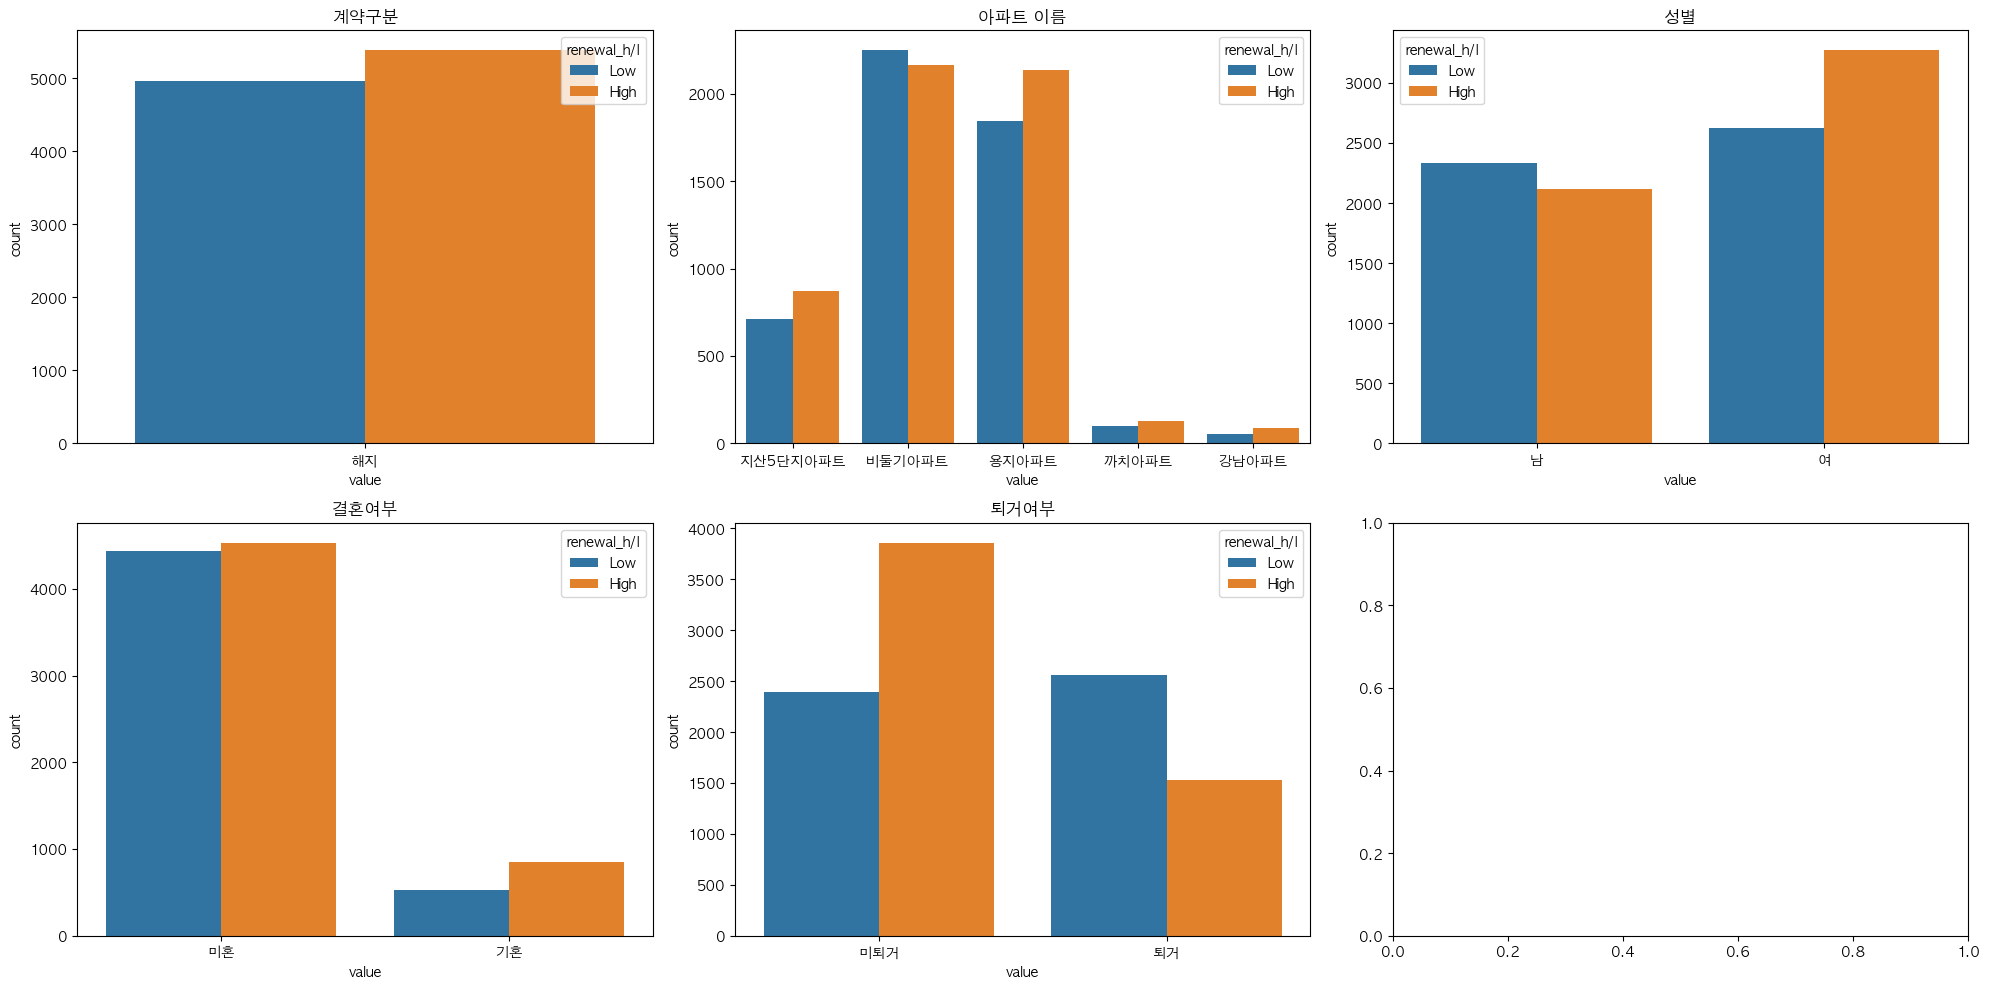

In [156]:
object_cols = ['계약구분', '아파트 이름', '성별', '결혼여부', '퇴거여부']
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()
for i, column in enumerate(object_cols):
    sns.countplot(data=df_latest_preproc, x=column, ax=axes[i],hue='renewal_h/l')
    axes[i].set_title(column)
    axes[i].set_xlabel('value')
    axes[i].set_ylabel('count')
plt.tight_layout()

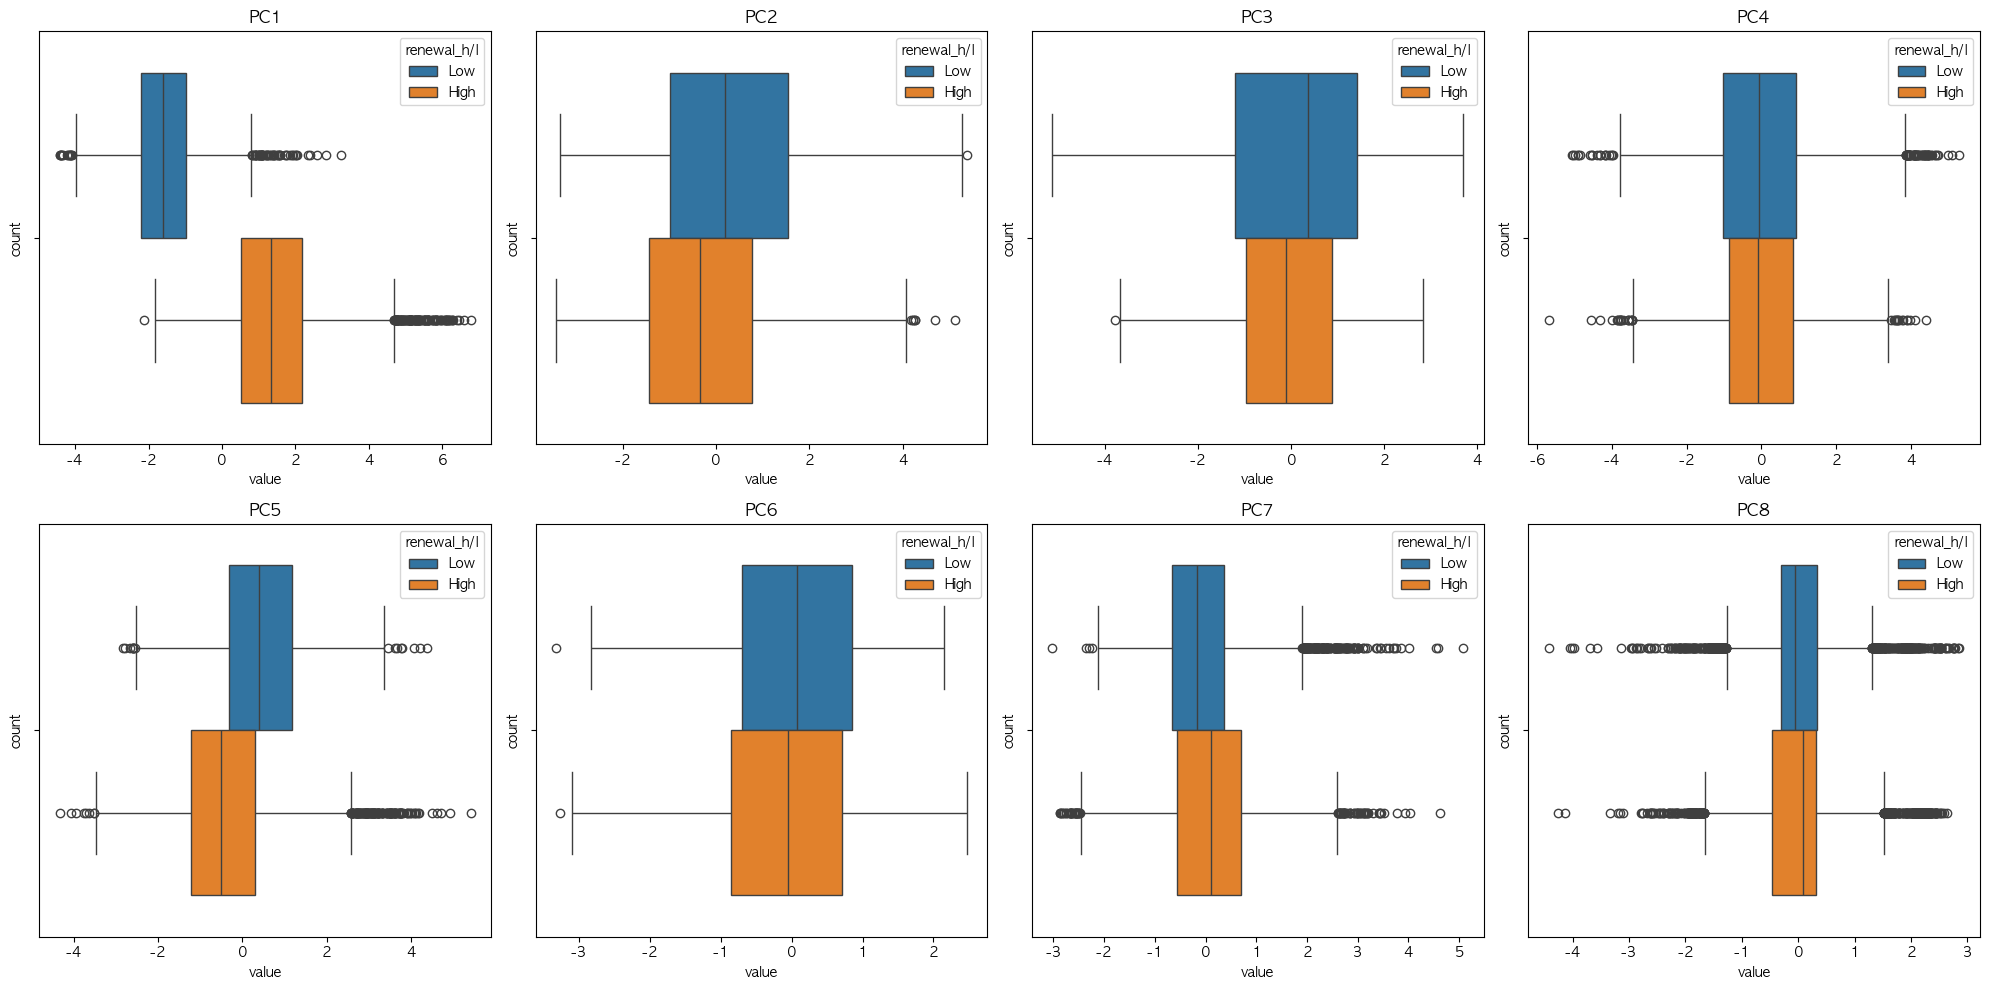

In [160]:
numeric_cols = ['PC1', 'PC2','PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8']
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()
for i, column in enumerate(numeric_cols):
    sns.boxplot(data=df_latest_preproc, x=column, ax=axes[i], hue='renewal_h/l')
    axes[i].set_title(column)
    axes[i].set_xlabel('value')
    axes[i].set_ylabel('count')
plt.tight_layout()


In [165]:
df.columns

Index(['순번', '계약구분', '재계약횟수', '거주개월', '아파트 이름', '아파트 ID', '아파트 평점', '호실고유번호',
       '층', '평형대', '계약자고유번호', '계약서고유번호', '입주연도', '퇴거연도', '거주연도', '월세(원)',
       '보증금(원)', '대표나이', '나이', '성별', '결혼여부', '거주자 수', '퇴거여부'],
      dtype='object')

In [179]:
# 1-7. 재계약횟수를 종속변수로 하는 회귀분석을 두 가지 이상의 방법론을 통해 수행하고 최종 모델을 결정하시오.
df_latest = df.sort_values('거주연도', ascending=False).groupby('계약자고유번호').head(1).copy()
df_latest.head()

target_col = '재계약횟수'
y = df_latest[target_col]
X = df_latest.drop(columns=[target_col])

X['퇴거연도'] = X['퇴거연도'].fillna(X['거주연도'])
X['계약구분'] = X['퇴거연도'].apply(lambda x: '유효' if x is None else '해지')

apt_score_dict = df.dropna().set_index('아파트 이름')['아파트 평점'].to_dict()
X['아파트 평점'] = X['아파트 이름'].map(apt_score_dict)

X_number_df = X.select_dtypes('number').drop(columns=['순번', '계약자고유번호', '계약서고유번호'])

X_object_df = X.select_dtypes('object')
X_object_df = X_object_df.drop(columns=['아파트 이름'])
X_object_df = pd.get_dummies(X_object_df, drop_first=True).astype(int)

X = pd.concat([X_number_df, X_object_df], axis=1)

In [190]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [191]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_train_pred = linear_model.predict(X_train_scaled)
y_test_pred = linear_model.predict(X_test_scaled)

from sklearn.metrics import root_mean_squared_error, r2_score

train_rmse = root_mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_rmse = root_mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)


print(f"Train RMSE: {train_rmse}, Train R2: {train_r2}")
print(f"Test RMSE: {test_rmse}, Test R2: {test_r2}")

Train RMSE: 0.7813647254036733, Train R2: 0.9405322973623947
Test RMSE: 0.894715387718188, Test R2: 0.9245123593991872


In [192]:
from sklearn.ensemble import RandomForestRegressor

randomforest_model = RandomForestRegressor(n_estimators=100, random_state=42)
randomforest_model.fit(X_train_scaled, y_train)
y_train_pred = randomforest_model.predict(X_train_scaled)
y_test_pred = randomforest_model.predict(X_test_scaled)

train_rmse = root_mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse}, Train R2: {train_r2}")
print(f"Test RMSE: {test_rmse}, Test R2: {test_r2}")

Train RMSE: 0.24233813651341465, Train R2: 0.9942797226428476
Test RMSE: 0.7658929302953048, Test R2: 0.9446850964145471


In [193]:
'''
Randomforestregressor 가 train, test 모두 RMSE, R2 점수가 더 좋다.
다만, linearregression 모델에 비해 train과 test의 점수차이가 크다.
이로 인해 overfitting이 발생한것으로 보인다.

일단 Randomforestregressor 모델을 사용하되 이후 overfitting을 방지하기 위해 max_depth를 조정해보는 과정이 필요해보인다..
'''

'\nRandomforestregressor 가 train, test 모두 RMSE, R2 점수가 더 좋다.\n다만, linearregression 모델에 비해 train과 test의 점수차이가 크다.\n이로 인해 overfitting이 발생한것으로 보인다.\n\n일단 Randomforestregressor 모델을 사용하되 이후 overfitting을 방지하기 위해 max_depth를 조정해보는 과정이 필요해보인다..\n'

In [ ]:
# 1-8. 최종 채택한 모델에서 각각 유의하게 작용하는 변수를 확인하고 설명하시오.

col_importance_dict = dict(zip(X.columns, randomforest_model.feature_importances_))
col_importance_df = pd.DataFrame.from_dict(col_importance_dict, orient='index', columns=[
                                           'importance']).sort_values(by='importance', ascending=False)
col_importance_df

,importance
거주개월,0.947563
보증금(원),0.009017
호실고유번호,0.006590
입주연도,0.005359
월세(원),0.004735
거주연도,0.003726
층,0.003722
퇴거연도,0.003392
거주자 수,0.003389
대표나이,0.003294


In [ ]:
# 1-9. 해당 분석결과로 얻을 수 있는 인사이트를 제시하시오.
'''
거주 개월이 가장 중요한 요소이다.
'''

## 1. 머신 러닝 (50+20점)
데이터 설명 : 야구 경기 데이터

In [308]:
import pandas as pd
raw_df = pd.read_csv('./../data/29_problem2.csv')
raw_df.head()

,game_id,a1_1,a1_2,a2_1,a2_2,a3_1,a3_2,a4_1,a4_2,a5_1,...,a9_2,b1,b2,b3,b4,b5,b6,b7,b8,b9
0,201900016,5,5,5,5,5,5,5,5,5,...,5,0,0,0,0,0,0,0,4,2
1,201900023,6,4,5,5,2,5,1,1,6,...,7,3,0,0,1,0,1,3,1,0
2,201900103,5,6,5,5,1,9,5,4,6,...,6,0,0,1,1,4,1,2,0,1
3,201900112,5,7,6,1,5,5,1,5,1,...,5,0,3,0,0,0,0,1,0,0
4,201900131,5,1,2,5,2,5,7,2,6,...,6,0,2,4,1,2,2,0,1,0


In [309]:
df = raw_df.copy()

In [ ]:
# 2-1 회차별로 1번 타자의 출루[1,2,3루타와 사사구(볼넷, 몸에 맞는공)]가 있는 경우에 대해
# 득점이 발생했는지 확인하는 분석을 위한 전처리 과정을 수행하시오
# (단, 첫 번째 혹은 두 번째 타자가 홈런을 친 경우는 해당 회차 데이터는 제외)

# 1,2,3루타와 사사구(볼넷, 몸에 맞는공)
hit_types = [1, 2, 3, 6]

In [327]:
result_dict = dict()
for idx, row in df.iterrows():
    result_dict[row['game_id']] = list()

    for i in range(1, 10):
        result_dict[row['game_id']].append(
            (row[f'a{i}_1'], row[f'a{i}_2'], row[f'b{i}'])
        )

In [328]:
result_df = pd.DataFrame().from_dict(result_dict, orient='index')
result_df = result_df.unstack().apply(pd.Series)
result_df = result_df.reset_index()
result_df.columns = ['inning', 'game_id', 'action_1', 'action_2', 'score']

In [329]:
(result_df['action_1'].isin(hit_types))

0       False
1        True
2       False
3       False
4       False
        ...  
1795     True
1796     True
1797     True
1798    False
1799    False
Name: action_1, Length: 1800, dtype: bool

In [330]:
result_df = result_df[(result_df['action_1'].isin(hit_types)) & (result_df['action_2'] != 4)]

In [331]:
# 2-2 2-1의 데이터에 대해 Logistic Regression을 적용하고 2번 타자의 희생번트 여부에 대한 회귀계수 검정을 적용하시오.
from sklearn.model_selection import train_test_split
result_df['is_bunt'] = result_df['action_2'].apply(lambda x: 1 if x == 9 else 0)
result_df['is_score'] = result_df['score'].apply(lambda x: 0 if x == 0 else 1)

X = result_df[['action_1', 'action_2', 'is_bunt']]
y = result_df['is_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, shuffle=True, stratify=y)

In [332]:
import statsmodels.api as sm

model = sm.Logit(y_train, sm.add_constant(X_train)).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.613331
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               is_score   No. Observations:                  261
Model:                          Logit   Df Residuals:                      257
Method:                           MLE   Df Model:                            3
Date:                Fri, 28 Mar 2025   Pseudo R-squ.:                 0.09905
Time:                        13:46:54   Log-Likelihood:                -160.08
converged:                       True   LL-Null:                       -177.68
Covariance Type:            nonrobust   LLR p-value:                 1.107e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7501      0.418      4.182      0.000       0.930       2.570
action_1       0.0122      0.063      0.193      0.847      -0.112       0.136
action_2      -0.3584      0.077     -4.674      0.000      -0.509      -0.208
is_bunt        2.6633      0.501      5.318      0.000       1.682       3.645
==============================================================================
"""

In [333]:
# 2-3 SMOTE(random_state=0)를 적용하여 Data Imbalance를 해결하시오.
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train_resampled.shape, y_train_resampled.shape

((302, 3), (302,))

In [334]:
# 2-4 2-3의 데이터에 Logistic Regression을 적용하고 결과를 분석하시오.

model = sm.Logit(y_train_resampled, sm.add_constant(X_train_resampled)).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.626430
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               is_score   No. Observations:                  302
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            3
Date:                Fri, 28 Mar 2025   Pseudo R-squ.:                 0.09625
Time:                        13:48:08   Log-Likelihood:                -189.18
converged:                       True   LL-Null:                       -209.33
Covariance Type:            nonrobust   LLR p-value:                 9.216e-09
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2556      0.362      3.469      0.001       0.546       1.965
action_1       0.0072      0.058      0.123      0.902      -0.107       0.122
action_2      -0.3245      0.067     -4.817      0.000      -0.457      -0.192
is_bunt        2.6962      0.465      5.803      0.000       1.786       3.607
==============================================================================
"""

##  2. 통계분석 (50점) 

In [335]:
# 1. 제품 A의 불량률은 0.03이다. 25개의 제품을 뽑았을 때 3개가 불량일 확률을 구하시오.
# (소수점 다섯째 자리에서 반올림)

from scipy.stats import binom
p = 0.03
n = 25
k = 3
binom.pmf(k, n, p)

0.03177384363983217

In [ ]:
# 2. 해당하는 데이터를 분석하여 답하시오.

,name,ratio
0,A,10.993428
1,A,9.723471
2,A,11.295377
3,A,13.046060
4,A,9.531693


In [ ]:
# 2-1. C사 생산 제품 1000개 중 양품이 600개, D사 생산 제품 500개 중 양품이 200개이다. 두 회사의 양품률 차이가 있는지 검정하시오.
from statsmodels.stats.proportion import proportions_ztest

# 성공 횟수
count = [600, 200]
# 전체 샘플 수
nobs = [1000, 500]

stat, pval = proportions_ztest(count, nobs)
print(f"Z-statistic: {stat:.3f}, p-value: {pval:.3f}")

Z-statistic: 7.319, p-value: 0.000


In [350]:
# 2-2. 각 차종별 범퍼 파손의 정도에 차이가 유의한지 검정하시오.
import pandas as pd
raw_df = pd.read_csv('./../data/29_problem3.csv')
raw_df.head()

,name,ratio
0,A,10.993428
1,A,9.723471
2,A,11.295377
3,A,13.046060
4,A,9.531693


In [351]:
df = raw_df.copy()

In [353]:
from scipy import stats

statistic, p_value = stats.f_oneway(
    df[df['name'] == 'A']['ratio'],
    df[df['name'] == 'B']['ratio'],
    df[df['name'] == 'C']['ratio'],
    df[df['name'] == 'D']['ratio'],
)

print(f"F-statistic: {statistic:.3f}, p-value: {p_value:.3f}")
if p_value < 0.05:
    print('파손의 정도의 차이가 유의미하다.')   
else:
    print('파손의 정도의 차이가 유의미하지 않다.')


F-statistic: 24.977, p-value: 0.000
파손의 정도의 차이가 유의미하다.


In [355]:
# 2-3. 귀무가설을 채택한다면 그 의미를 해석하고, 귀무가설을 기가하였다면 사후분석을 시행하시오.
from statsmodels.stats.multicomp import MultiComparison
com = MultiComparison(df['ratio'], df['name'])
result = com.tukeyhsd()
print(result.summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B   5.3934  0.001   2.1785  8.6083   True
     A      C  -4.2156 0.0085  -7.4305 -1.0007   True
     A      D  -0.7086 0.9207  -3.9235  2.5063  False
     B      C   -9.609    0.0 -12.8239 -6.3941   True
     B      D   -6.102 0.0003  -9.3169 -2.8871   True
     C      D    3.507 0.0302   0.2921  6.7219   True
-----------------------------------------------------


In [ ]:
# 3. L1,L2,L3 세 개의 생산라인에서 가각 13%, 37%, 50%를 생산하며
# 각각 1.1%, 2.1%, 3.3% 불량률을 갖는다. 불량 제품이 나왔을 때 L1 라인에서 생산되었을 확률을 구하시오.
# (소수점 둘째자리에서 반올림)

In [356]:
(0.13 * 1.1) / (0.13 * 1.1 + 0.37 * 2.1 + 0.5 * 3.3)

0.05564202334630351